In [13]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = malignant, 1 = benign

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


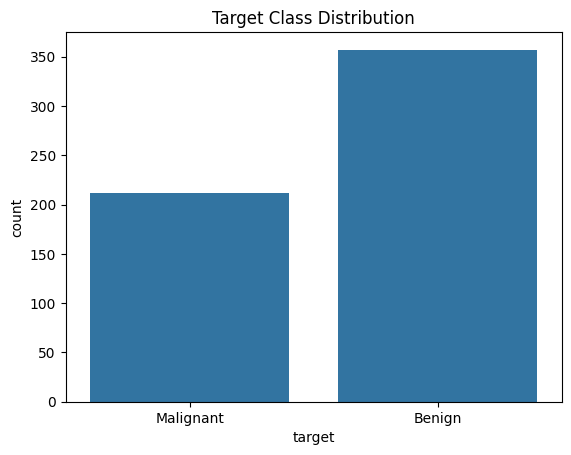

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='target')
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.title('Target Class Distribution')
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

results = {}

def train_and_evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"\n📌 {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    results[name] = {'accuracy': acc, 'roc_auc': roc_auc}


In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



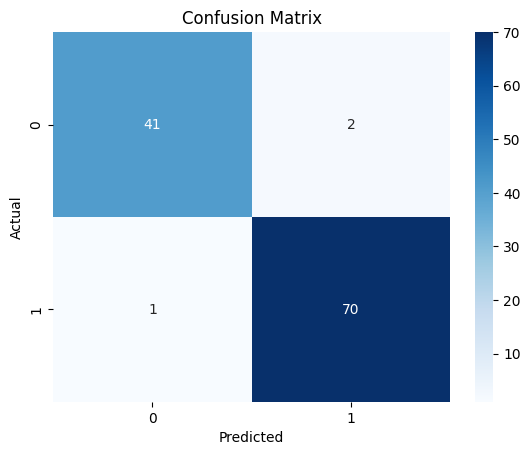

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [19]:
import joblib

joblib.dump(model, 'cancer_detection_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
train_and_evaluate(LogisticRegression(), "Logistic Regression")

# Random Forest
train_and_evaluate(RandomForestClassifier(), "Random Forest")

# SVM (with probability=True to get ROC AUC)
train_and_evaluate(SVC(probability=True), "SVM")

# K-Nearest Neighbors
train_and_evaluate(KNeighborsClassifier(), "K-Nearest Neighbors")

# Decision Tree
train_and_evaluate(DecisionTreeClassifier(), "Decision Tree")

# Gradient Boosting (optional but powerful)
train_and_evaluate(GradientBoostingClassifier(), "Gradient Boosting")



📌 Logistic Regression
Accuracy: 0.9737
ROC AUC Score: 0.9974
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


📌 Random Forest
Accuracy: 0.9649
ROC AUC Score: 0.9967
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


📌 SVM
Accuracy: 0.9825
ROC AUC Score: 0.9974
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
    

/tmp/ipython-input-4154817486.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='roc_auc', y=df_results.index, data=df_results, palette="Blues_d")


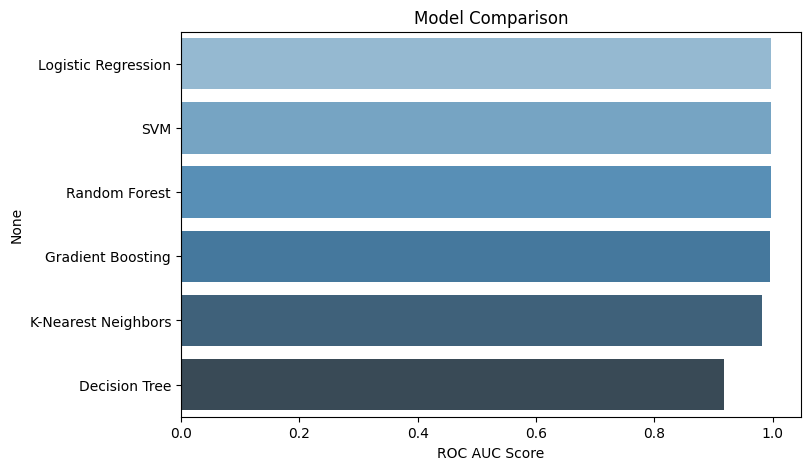

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_results = pd.DataFrame(results).T.sort_values(by='roc_auc', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='roc_auc', y=df_results.index, data=df_results, palette="Blues_d")
plt.xlabel('ROC AUC Score')
plt.title('Model Comparison')
plt.show()


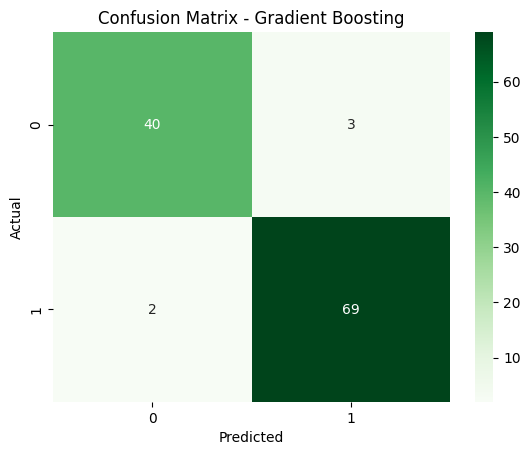

In [23]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Example: use Gradient Boosting or best performing model again
best_model = GradientBoostingClassifier()
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
